In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(123)

alpha,sigma = 1,1
beta = [1,2.5]

size = 100

X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

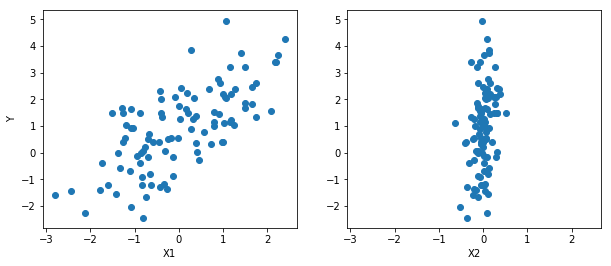

In [3]:
fig, axes = plt.subplots(1,2,sharex=True, figsize=(10,4))
axes[0].scatter(X1,Y)
axes[1].scatter(X2,Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [4]:
from pymc3 import Model, Normal, HalfNormal

In [5]:
basic_model = Model()

In [6]:
with basic_model:
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)
    
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [7]:
from pymc3 import find_MAP

In [8]:
map_estimate = find_MAP(model=basic_model)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21
{'alpha': array(0.9065985497559482), 'beta': array([ 0.94848602,  2.60705514]), 'sigma_log_': array(-0.0327814701740307)}


In [9]:
from pymc3 import NUTS, sample
from scipy import optimize

In [10]:
with basic_model:
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -368.91:  14%|█▍        | 28068/200000 [00:01<00:11, 15040.90it/s]Median ELBO converged.
Finished [100%]: Average ELBO = -154.13

100%|█████████▉| 1992/2000 [00:01<00:00, 1314.48it/s]/Users/libland/miniconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/Users/libland/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 2000/2000 [00:01<00:00, 1133.42it/s]


In [12]:
trace['alpha'][-5:]

array([ 0.84238178,  0.83903632,  0.94790009,  0.81551754,  1.09953945])

(array([   7.,   41.,  134.,  338.,  514.,  496.,  323.,   99.,   44.,    4.]),
 array([ 0.90063372,  1.24675643,  1.59287914,  1.93900185,  2.28512456,
         2.63124727,  2.97736998,  3.32349269,  3.6696154 ,  4.01573811,
         4.36186082]),
 <a list of 10 Patch objects>)

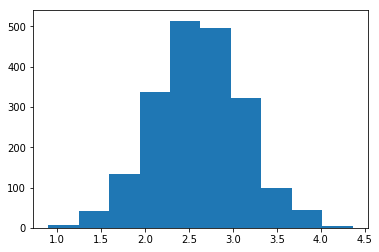

In [15]:
plt.hist(trace['beta'][:,1])

In [16]:
from pymc3 import traceplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110ffb1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111428b10>]], dtype=object)

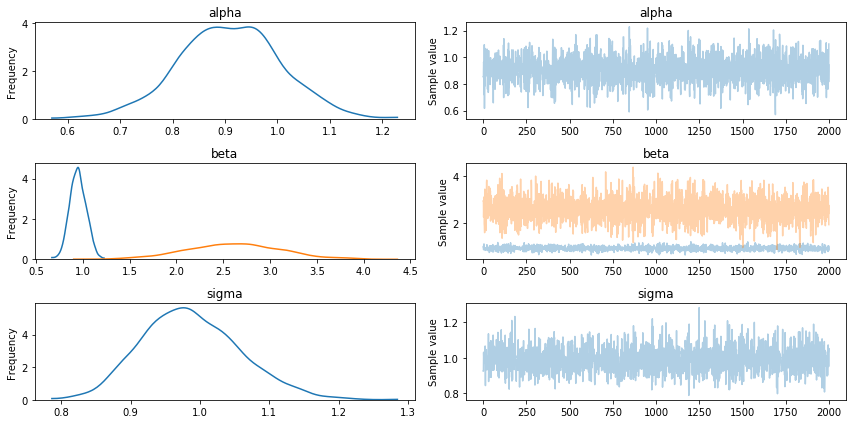

In [17]:
traceplot(trace)